# Taller de Física Computacional

Carlos Ruestes / Cristián Sánchez - Taller de Física Computacional - FCEN - UNCUYO

# Sesión 4: Numpy

Las listas en Python son contenedores abstractos que pueden contener estructuras de datos de cualquier tipo, números, cadenas, otras listas, etc.. Esa versatilidad tiene un problema. Las hace **lentas**. Si bien es posible utilizar listas para almacenar objetos tales como vectores, matrices o arreglos multidimensionales no son la estructura de datos ideal. Esto es porque los vectores o matrices que podemos necesitar en física computacional son, en general, de elementos que tienen todos el mismo tipo: números reales por ejemplo. El que los elementos sean del mismo tipo implica un acceso más rápido. Para lograr ese acceso rápido el objeto `ndarray` de Numpy almacena los datos numéricos en una sección de memoria única en direcciones contiguas. 

La estructura `ndarray` y las rutinas para su manipulación implementadas en el paquete NumPy proporcionan la base para poder trabajar en Python con arreglos multidimensionales de forma eficiente. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

## Formas de crear arreglos

In [2]:
n = 3

In [3]:
a = np.empty((n,n)) # Arreglo vacío no inicializado, matrix de 3x3
a

array([[6.e-323, 0.e+000, 0.e+000],
       [0.e+000, 0.e+000, 0.e+000],
       [0.e+000, 0.e+000, 0.e+000]])

In [4]:
b = np.zeros((n,n)) # Arreglo inicializado con ceros
b

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [5]:
c = np.zeros_like(b) # Arreglo inicializado a cero con la misma forma de b
c

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
d = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]]) # conversión de una lista a un ndarray
d

array([[1., 2., 3.],
       [4., 5., 6.]])

In [7]:
e = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]],dtype=complex) # establecemos el tipo de datos explícitamente
e

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [4.+0.j, 5.+0.j, 6.+0.j]])

In [8]:
f = np.arange(0,10,0.1) # vector de números equiespaciados en 0.1 entre 0 y 10
f

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [9]:
g = np.linspace(0,2*np.pi,10) # vector de 10 elementos equiespaciados entre 0 y 2*pi
g

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [10]:
o = np.random.rand(3,3) # matriz 3x3 de números aleatorios
o

array([[0.92896465, 0.41386987, 0.30842074],
       [0.43726798, 0.5772767 , 0.46071506],
       [0.69369227, 0.21428785, 0.02204124]])

## Formas de acceder y asignar los elementos de un arreglo

In [11]:
a = np.random.rand(3,3)

In [12]:
a

array([[0.83198241, 0.56237808, 0.34754794],
       [0.99109647, 0.97815119, 0.85906088],
       [0.70889019, 0.07222796, 0.59853858]])

Acceso y asignación por índices

In [13]:
a[0,0]

0.8319824133950221

In [14]:
a[2,1]

0.07222796026862932

In [15]:
a[0,0] = 1.0

In [16]:
a[2,1] = 1.0

Acceso y asignación por *slices*

In [17]:
a[:,2]

array([0.34754794, 0.85906088, 0.59853858])

In [18]:
a[2,:]

array([0.70889019, 1.        , 0.59853858])

In [19]:
a[0:1,:]

array([[1.        , 0.56237808, 0.34754794]])

In [20]:
a

array([[1.        , 0.56237808, 0.34754794],
       [0.99109647, 0.97815119, 0.85906088],
       [0.70889019, 1.        , 0.59853858]])

In [21]:
a[:,2] = 1.0

In [22]:
a[2,:] = 5.0

## Vectorización, operaciones entre arreglos y funciones de arreglos

In [23]:
# dos matrices 3x3 de números aleatorios entre cero y uno
a = np.random.rand(3,3)
b = np.random.rand(3,3)

In [24]:
a

array([[0.01144911, 0.1949968 , 0.15616462],
       [0.13748365, 0.84478903, 0.86206174],
       [0.77394057, 0.72690851, 0.02621679]])

In [25]:
b

array([[0.60289742, 0.69718754, 0.07043757],
       [0.96288805, 0.97347756, 0.61950065],
       [0.84799036, 0.46491533, 0.24791867]])

In [26]:
# multiplicar por dos cada elemento de a
2 * a

array([[0.02289822, 0.38999359, 0.31232925],
       [0.27496731, 1.68957806, 1.72412348],
       [1.54788114, 1.45381703, 0.05243358]])

In [27]:
# sumar 3j a cada elemento de a, notar la transformación de tipo
a + 3.0j

array([[0.01144911+3.j, 0.1949968 +3.j, 0.15616462+3.j],
       [0.13748365+3.j, 0.84478903+3.j, 0.86206174+3.j],
       [0.77394057+3.j, 0.72690851+3.j, 0.02621679+3.j]])

In [28]:
# suma de a y b
a + b

array([[0.61434653, 0.89218433, 0.2266022 ],
       [1.1003717 , 1.81826658, 1.48156239],
       [1.62193092, 1.19182384, 0.27413546]])

In [29]:
# resta de a y b
a - b

array([[-0.59144831, -0.50219074,  0.08572705],
       [-0.8254044 , -0.12868853,  0.24256109],
       [-0.07404979,  0.26199319, -0.22170188]])

In [30]:
# producto ELEMENTO A ELEMENTO entre a y b
a * b

array([[0.00690264, 0.13594934, 0.01099986],
       [0.13238137, 0.82238316, 0.5340478 ],
       [0.65629414, 0.33795091, 0.00649963]])

In [31]:
# producto matricial de a y b
a @ b

array([[0.32708882, 0.27041051, 0.16032321],
       [1.62734584, 1.31902076, 0.74675256],
       [1.18876988, 1.25939943, 0.51133442]])

In [32]:
# otra forma de expresar el producto matricial de a y b
a.dot(b)

array([[0.32708882, 0.27041051, 0.16032321],
       [1.62734584, 1.31902076, 0.74675256],
       [1.18876988, 1.25939943, 0.51133442]])

In [33]:
# otra forma mas de expresar el producto matricial de a y b
np.dot(a,b)

array([[0.32708882, 0.27041051, 0.16032321],
       [1.62734584, 1.31902076, 0.74675256],
       [1.18876988, 1.25939943, 0.51133442]])

In [34]:
# seno elemento a elemento
np.sin(a)

array([[0.01144886, 0.19376339, 0.15553066],
       [0.13705095, 0.74783107, 0.75918611],
       [0.6989588 , 0.66456276, 0.02621379]])

In [35]:
# loraritmo elemento a elemento
np.log(b)

array([[-0.50600821, -0.36070084, -2.65302845],
       [-0.03781812, -0.02688051, -0.47884154],
       [-0.16488602, -0.76589998, -1.39465453]])

In [36]:
# matriz transpuesta
a.T

array([[0.01144911, 0.13748365, 0.77394057],
       [0.1949968 , 0.84478903, 0.72690851],
       [0.15616462, 0.86206174, 0.02621679]])

In [37]:
# suma de todos los elementos de a
np.sum(a)

3.73401081836011

In [38]:
# vector con los elementos diagonales de a
a.diagonal()

array([0.01144911, 0.84478903, 0.02621679])

In [39]:
a

array([[0.01144911, 0.1949968 , 0.15616462],
       [0.13748365, 0.84478903, 0.86206174],
       [0.77394057, 0.72690851, 0.02621679]])

In [40]:
# valor máximo de entre los elementos de a
a.max()

0.8620617396534554

In [41]:
# valor mínimo de entre los elementos de a
a.min()

0.011449108258230756

In [42]:
# tupla de coordenadas del elemento máximo
np.unravel_index(np.argmax(a), a.shape)

(1, 2)

In [43]:
# media entre los elementos de a
a.mean()

0.4148900909289011

In [44]:
# suma de los elementos de a fila a fila
np.sum(a,axis=0)

array([0.92287333, 1.76669434, 1.04444315])

In [45]:
# suma de los elementos de a columna a columna
np.sum(a,axis=1)

array([0.36261053, 1.84433442, 1.52706587])

In [46]:
# transpuesta congujada de a
(a + 1j).conjugate().T

array([[0.01144911-1.j, 0.13748365-1.j, 0.77394057-1.j],
       [0.1949968 -1.j, 0.84478903-1.j, 0.72690851-1.j],
       [0.15616462-1.j, 0.86206174-1.j, 0.02621679-1.j]])

In [47]:
# ndarray de Booleanos conteniendo la evaluación de la expresión lógica elemento a elemento
a > 0.5

array([[False, False, False],
       [False,  True,  True],
       [ True,  True, False]])

In [48]:
# valores de a que cumplen con la condición
a[a > 0.5]

array([0.84478903, 0.86206174, 0.77394057, 0.72690851])

## Vectorización de funciones definidas por el usuario

In [49]:
a = np.random.rand(3,3) - 0.5

In [50]:
a

array([[-0.31489976,  0.35009339,  0.25396506],
       [ 0.1976376 ,  0.00727453,  0.41341867],
       [ 0.16509884, -0.09960665, -0.20370626]])

Defino una función como lo hemos hecho siempre

In [51]:
def val_abs(x):
    if x >= 0.0:
        return x
    else:
        return -x

al tratar de aplicarla a un `ndarray` falla

In [52]:
val_abs(a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

la función `numpy.vectorize()` me devuelve una versión *vectorizada* que puedo utilizar con argumentos de tipo `ndarray`

In [53]:
vec_abs = np.vectorize(val_abs)

In [54]:
vec_abs(a)

array([[0.31489976, 0.35009339, 0.25396506],
       [0.1976376 , 0.00727453, 0.41341867],
       [0.16509884, 0.09960665, 0.20370626]])

## Siempre que sea posible usar operaciones vectorizadas

In [55]:
a = np.random.rand(1000,1000) - 0.5
b = np.random.rand(1000,1000) - 0.5
c = np.zeros_like(a)

In [56]:
%%timeit
for i in range(1000):
    for j in range(1000):
        c[i,j] = m.cos(a[i,j]) + m.sin(b[j,i])

686 ms ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
%%timeit
c = np.cos(a) + np.sin(b.T)

6.31 ms ± 308 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Notar que la versión vectorizada es 100 veces más rápida!

## Algunos gráficos

Utilizando Numpy y sus herramientas para generar arreglos y aplicarles funciones se facilita enormemente la creación de gráficos, entrew muuuuchas otras operaciones. Si utilizaramos listas deberíamos (como lo hicimos antes) escribir bucles para operar elemento a elemento. La potente interfaz vectorial de numpy permite generar código complejo de forma elegante y legible.

In [58]:
x = np.linspace(0,15*m.pi,1000)
y = np.exp(-0.1*x)*np.sin(5*x)

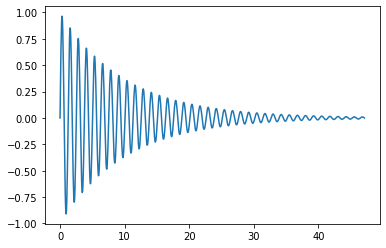

In [59]:
plt.plot(x,y)

La función `numpy.meshgrid()` permite obtener dos matrices que contienen los valores de las coordenadas x e y en una grilla dimensional a partir de un par de vectores conteniendo los valores de x e y en los ejes. Esto me permite generar luego, sobre esa greilla los valores de una función de dos variables y graficarla.

In [60]:
x = np.linspace(0, 2*m.pi, 500)
y = np.linspace(0, 2*m.pi, 500)  
xm, ym = np.meshgrid(x, y)

In [61]:
z = np.sin(xm)**10 + np.cos(10 + ym*xm) * np.cos(xm)

El siguiente es un gráfico de contornos

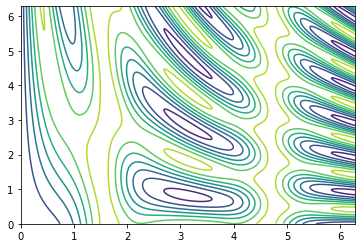

In [62]:
plt.contour(x, y, z)

El siguiente es un gráfico de contornos llenos

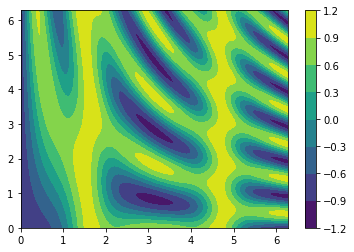

In [63]:
plt.contourf(x, y, z)
plt.colorbar()

La función `streamplot` permite hacer gráficos de funciones vectoriales.

In [64]:
x = np.linspace(-m.pi, m.pi, 300)
y = np.linspace(-m.pi, m.pi, 300)  
xm, ym = np.meshgrid(x, y)

In [65]:
u = -1 - xm**2 + ym
v = 1 + xm - ym**2
speed = np.sqrt(u*u + y*y)

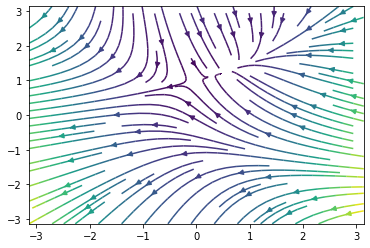

In [66]:
plt.streamplot(xm,ym,u,v,color=speed)